In [1]:
#importación de librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv

In [2]:
#Carga de los archivos csv por año ubicados en: https://drive.google.com/drive/folders/10BtFS1WbWR7ZQ19MlgSB74CF0we8ztUB?usp=drive_link 
df_2020 = pd.read_csv('C:/equipo/DevHitss/unir/Maestria/TFM/humedad_5a/TFM.humedad_2020.csv')
df_2021 = pd.read_csv('C:/equipo/DevHitss/unir/Maestria/TFM/humedad_5a/TFM.humedad_2021.csv')
df_2022 = pd.read_csv('C:/equipo/DevHitss/unir/Maestria/TFM/humedad_5a/TFM.humedad_2022.csv')
df_2023 = pd.read_csv('C:/equipo/DevHitss/unir/Maestria/TFM/humedad_5a/TFM.humedad_2023.csv')
df_2024 = pd.read_csv('C:/equipo/DevHitss/unir/Maestria/TFM/humedad_5a/TFM.humedad_2024.csv')
df_2025 = pd.read_csv('C:/equipo/DevHitss/unir/Maestria/TFM/humedad_5a/TFM.humedad_2025.csv')
df_2025_2 = pd.read_csv('C:/equipo/DevHitss/unir/Maestria/TFM/humedad_5a/TFM.humedad_2025_may_jun.csv')

In [3]:
#Concatenación de los 6 archivos en un solo dataframe llamado df_concat
df_concat = pd.concat([df_2020, df_2021, df_2022, df_2023, df_2024, df_2025, df_2025_2], axis=0, ignore_index=True)
df_concat = df_concat.drop('_id', axis=1)
#Asegurarnos que la fechamedida sea un tipo de dato datetime
df_concat['fechamedida'] = pd.to_datetime(df_concat['fechamedida'])
#Creación de columnas para posterior análisis
df_concat['anio'] = df_concat['fechamedida'].dt.year
df_concat['mes'] = df_concat['fechamedida'].dt.month
df_concat['dia'] = df_concat['fechamedida'].dt.day
df_concat['hora'] = df_concat['fechamedida'].dt.hour
df_concat['nombre_mes'] = df_concat['mes'].map({
     1: 'Enero', 2: 'Febrero', 3: 'Marzo', 4: 'Abril', 5: 'Mayo', 6: 'Junio'
     , 7: 'Julio', 8: 'Agosto', 9: 'Septiembre', 10: 'Octubre', 11: 'Noviembre', 12: 'Diciembre'
})

In [4]:
#comprobación de registros cargados desde archivos dispuestos
print(len(df_concat))

33446808


In [5]:
#Creamos un nuevo dataframe con valores que no contengan cero (0) en el valor observado
df_filtrado = df_concat[df_concat['valorobservado'] != 0]
#Si queremos agregar también el filtro de departamento se debe habiltar la siguiente línea y deshabilitar las otras
#df_filtrado = df_concat[(df_concat['valorobservado'] != 0) & (df_concat['departamento'].isin(['CUNDINAMARCA']))]
#Si queremos agregar también el filtro por municipio se debe habiltar la siguiente línea y deshabilitar las anteriores
#df_filtrado = df_concat[(df_concat['valorobservado'] != 0) & (df_concat['municipio'].isin(['Villeta']))]

In [6]:
sns.set(style="whitegrid")

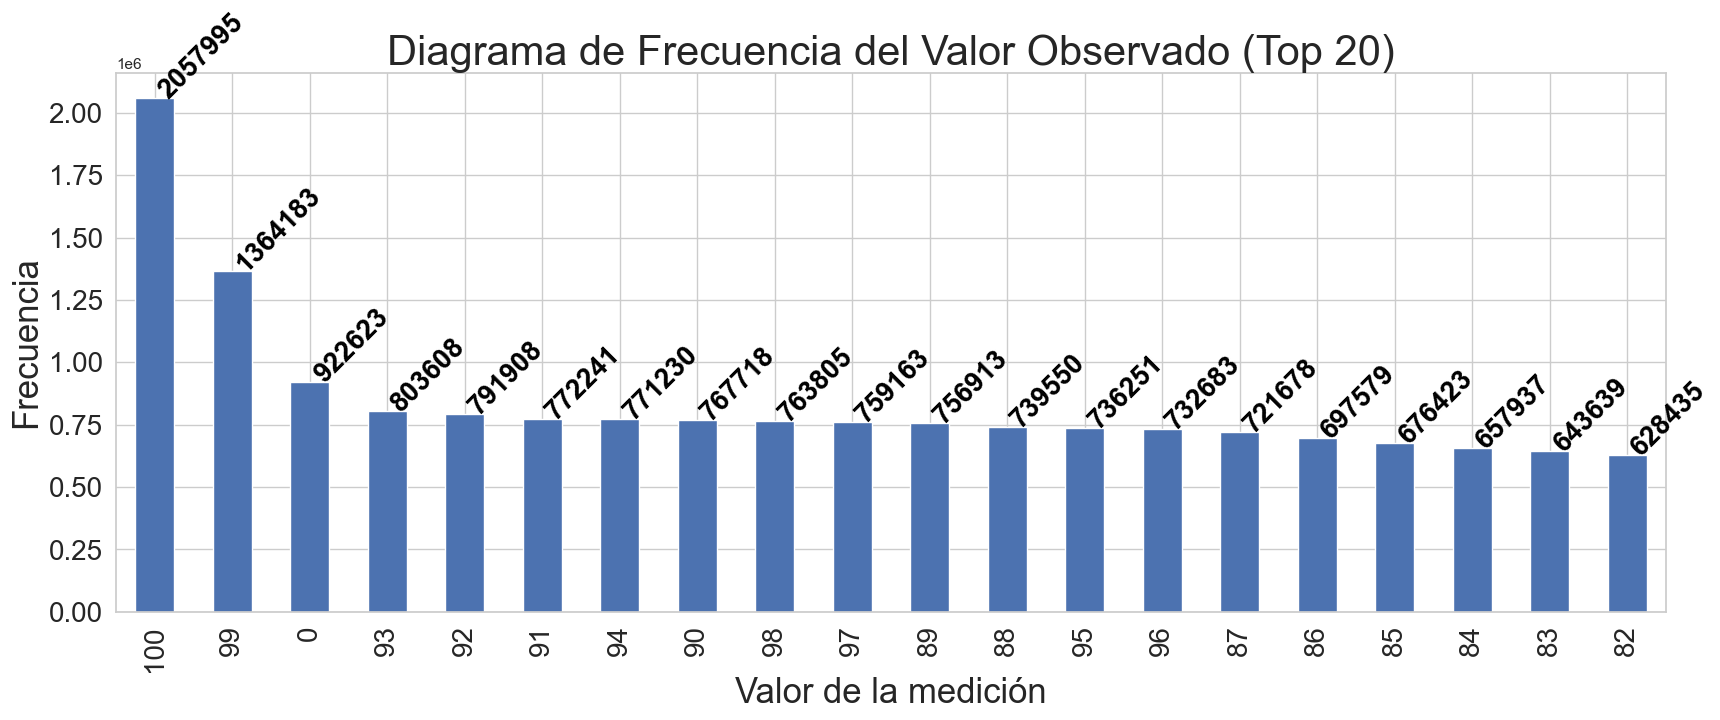

In [7]:
#Se realiza el análisis de frecuencia del valor observado y se crea una gráfica
frecuencias = df_concat['valorobservado'].value_counts()
#Selecciona solo las 15 primeras frecuencias
frecuencias_top_15 = frecuencias.head(20)
#Exporte del valores de frecuencia
frecuencias.to_csv('frecuencias_original.txt', sep='\t', header=True)
# Crea el gráfico de barras
plt.figure(figsize=(20, 7))
val = frecuencias_top_15.plot(kind='bar')
plt.title(f'Diagrama de Frecuencia del Valor Observado (Top 20)', fontsize=30)
plt.xlabel('Valor de la medición', fontsize=25)
plt.ylabel('Frecuencia', fontsize=25)
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)
# Añade los valores de frecuencia en las barras
for i, v in enumerate(frecuencias_top_15):
    val.text(i, v + 0.1, str(v), color='black', ha='left', fontweight='bold', fontsize=20, rotation=45)
plt.show()

In [8]:
# Verificación de valores nulos en el campo 'Valor observado'
nulos_en_columna_A = df_concat['valorobservado'].isnull().sum()
print(f"Número de valores nulos en 'valorobservado': {nulos_en_columna_A}")

# Verificación de valores nulos en el campo 'Departamento'
nulos_en_columna_B = df_concat['departamento'].isnull().sum()
print(f"Número de valores nulos en departamento: {nulos_en_columna_B}")

# Verificación de valores nulos en el campo 'Municipio'
nulos_en_columna_C = df_concat['municipio'].isnull().sum()
print(f"Número de valores nulos en municipio: {nulos_en_columna_C}")

# Verificación de valores nulos en el campo 'fechamedida '
nulos_en_columna_D = df_concat['fechamedida'].isnull().sum()
print(f"Número de valores nulos en fechamedida: {nulos_en_columna_D}")

Número de valores nulos en 'valorobservado': 0
Número de valores nulos en departamento: 0
Número de valores nulos en municipio: 0
Número de valores nulos en fechamedida: 0


In [9]:
#Análisis de frecuencias
# Definir número de bins (intervalos)
valores = df_filtrado['valorobservado']
num_bins = 10

# Calcular frecuencias y bins
freq, bins = np.histogram(valores, bins=num_bins)
total = freq.sum()
freq_rel = freq / total * 100  # porcentaje

# Crear tabla de frecuencias
intervalos = pd.IntervalIndex.from_arrays(bins[:-1], bins[1:])
tabla_frecuencias = pd.DataFrame({
    'Intervalo': intervalos,
    'Frecuencia': freq,
    'Frecuencia Relativa (%)': freq_rel,
})
tabla_frecuencias['Frecuencia Acumulada'] = tabla_frecuencias['Frecuencia'].cumsum()
tabla_frecuencias['Frecuencia Relativa Acumulada (%)'] = tabla_frecuencias['Frecuencia Relativa (%)'].cumsum()

print("Tabla de frecuencias:")
print(tabla_frecuencias)


Tabla de frecuencias:
                    Intervalo  Frecuencia  Frecuencia Relativa (%)  \
0                 (1.0, 10.9]      434473                 1.335846   
1                (10.9, 20.8]      116462                 0.358078   
2  (20.8, 30.700000000000003]     1403612                 4.315595   
3  (30.700000000000003, 40.6]      391588                 1.203990   
4                (40.6, 50.5]     1121057                 3.446841   
5  (50.5, 60.400000000000006]     2635402                 8.102899   
6  (60.400000000000006, 70.3]     4497106                13.826960   
7                (70.3, 80.2]     5470965                16.821221   
8   (80.2, 90.10000000000001]     6900453                21.216375   
9  (90.10000000000001, 100.0]     9553067                29.372195   

   Frecuencia Acumulada  Frecuencia Relativa Acumulada (%)  
0                434473                           1.335846  
1                550935                           1.693924  
2               1954547 

C:\Users\45686756\AppData\Local\Temp\ipykernel_18352\256180407.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(fontsize=20)


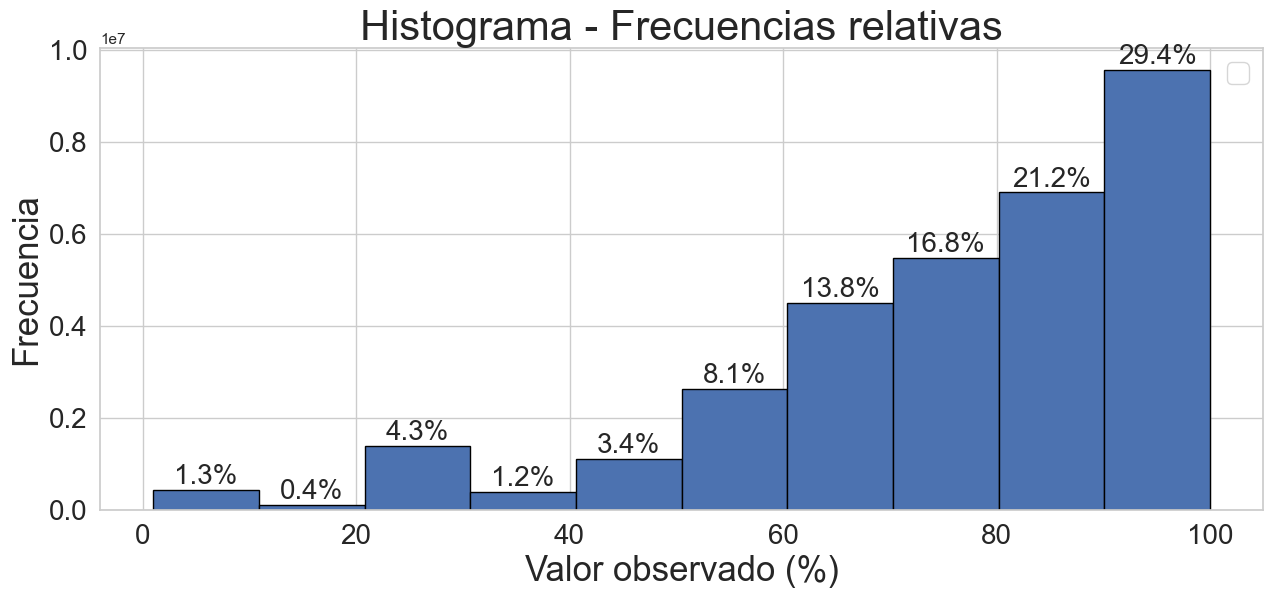

In [10]:

# 1. Histograma con frecuencias absolutas y etiquetas %
plt.figure(figsize=(15,6))
bars = plt.hist(valores, bins=num_bins, edgecolor='black')
plt.title('Histograma - Frecuencias relativas', fontsize=30)
plt.xlabel('Valor observado (%)', fontsize=25)
plt.ylabel('Frecuencia', fontsize=25)
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)
# Agregar etiquetas %
for count, left, right in zip(freq, bins[:-1], bins[1:]):
    plt.text((left + right) / 2, count, f'{count/total*100:.1f}%', ha='center', va='bottom', fontsize=20)
plt.legend(fontsize=20)
plt.show()


C:\Users\45686756\AppData\Local\Temp\ipykernel_18352\1810989019.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(fontsize=20)


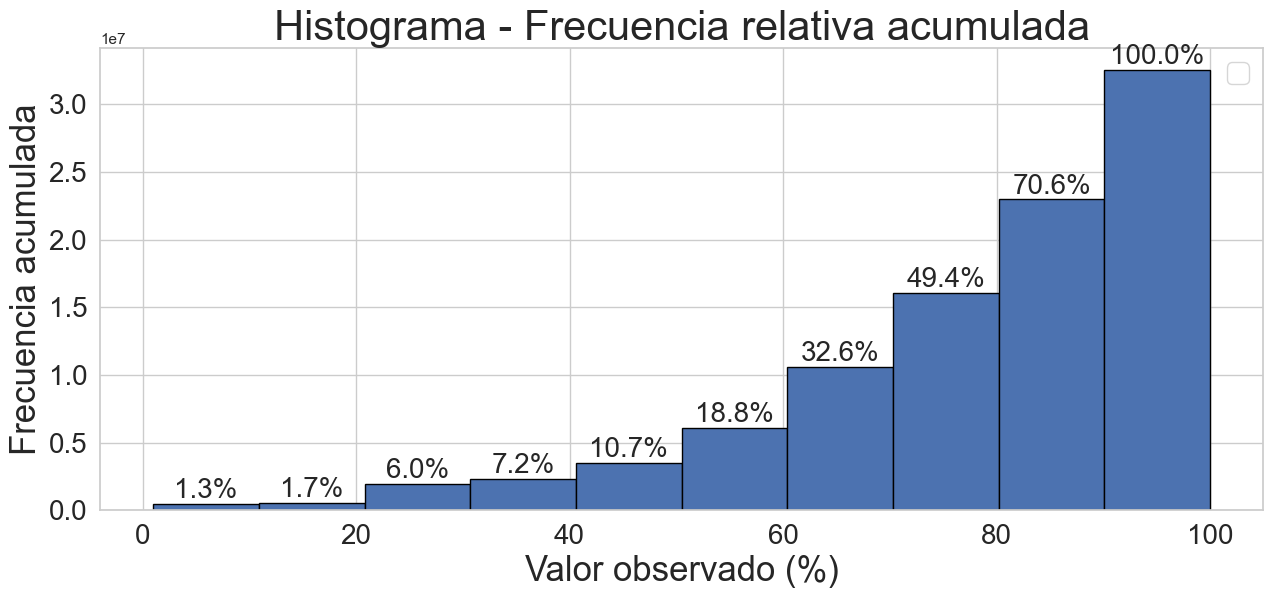

In [11]:

# 2. Histograma acumulativo
plt.figure(figsize=(15,6))
counts, bins, patches = plt.hist(valores, bins=num_bins, cumulative=True, edgecolor='black')
plt.title('Histograma - Frecuencia relativa acumulada', fontsize=30)
plt.xlabel('Valor observado (%)', fontsize=25)
plt.ylabel('Frecuencia acumulada', fontsize=25)
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)
# Agregar etiquetas en %
for count, left, right in zip(counts, bins[:-1], bins[1:]):
    pct = count / total * 100
    plt.text((left + right) / 2, count, f'{pct:.1f}%', ha='center', va='bottom', fontsize=20)
plt.legend(fontsize=20)
plt.grid(True)
plt.show()

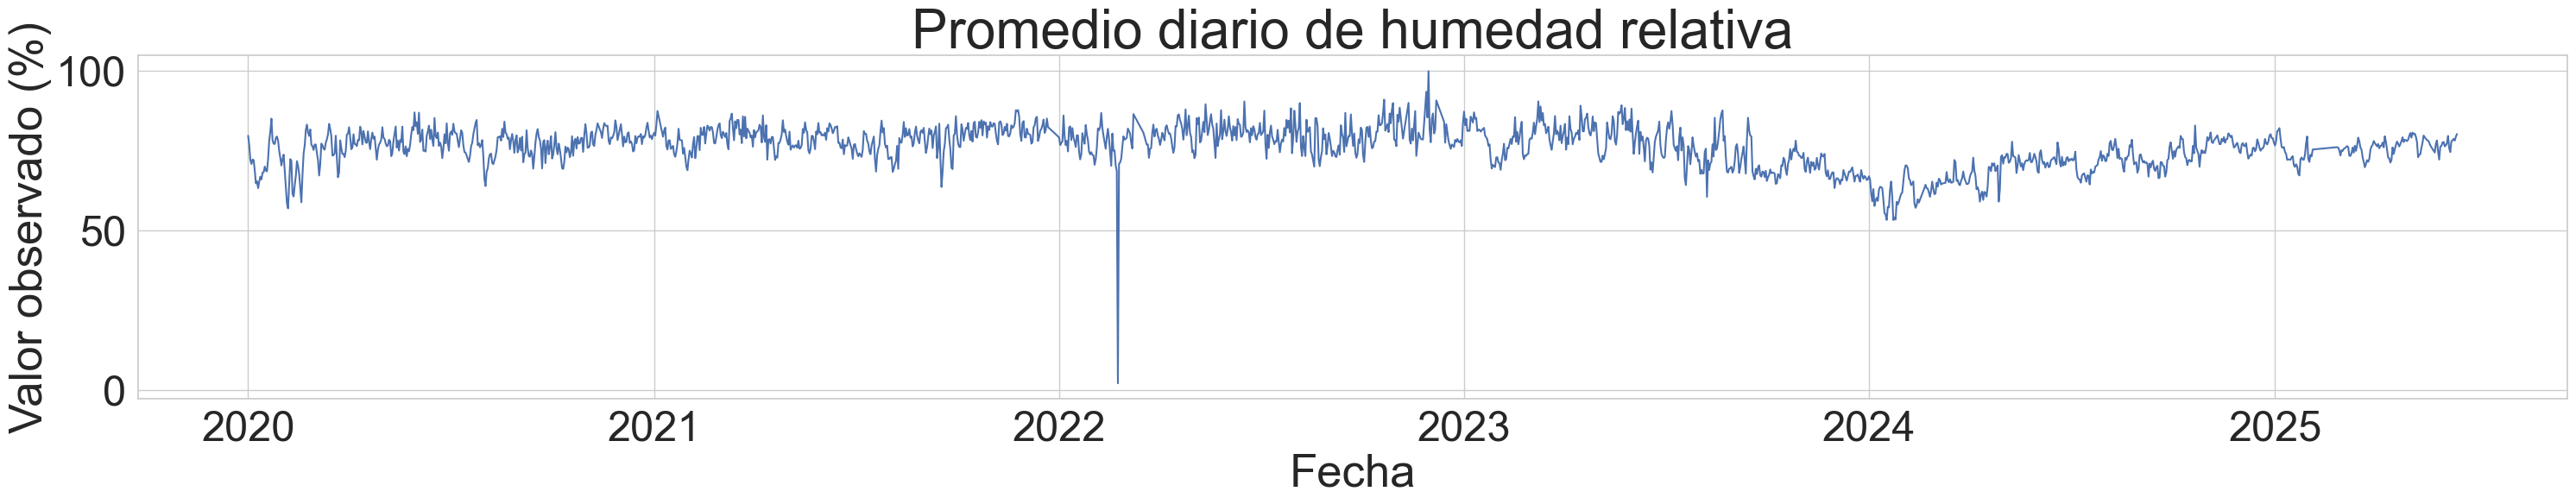

In [ ]:
# 3. Promedio diario
promedio_diario = df_filtrado.groupby(df_filtrado['fechamedida'].dt.date)['valorobservado'].mean()
#Exporte del promedio diario
promedio_diario.to_csv('promedio_diario.txt', sep='\t', header=True)
plt.figure(figsize=(30,6))
promedio_diario.plot()
plt.title('Promedio diario de humedad relativa', fontsize=45)
plt.xlabel('Fecha', fontsize=38)
plt.ylabel('Valor observado (%)', fontsize=38)
plt.tick_params(axis='x', labelsize=35)
plt.tick_params(axis='y', labelsize=35)
#plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

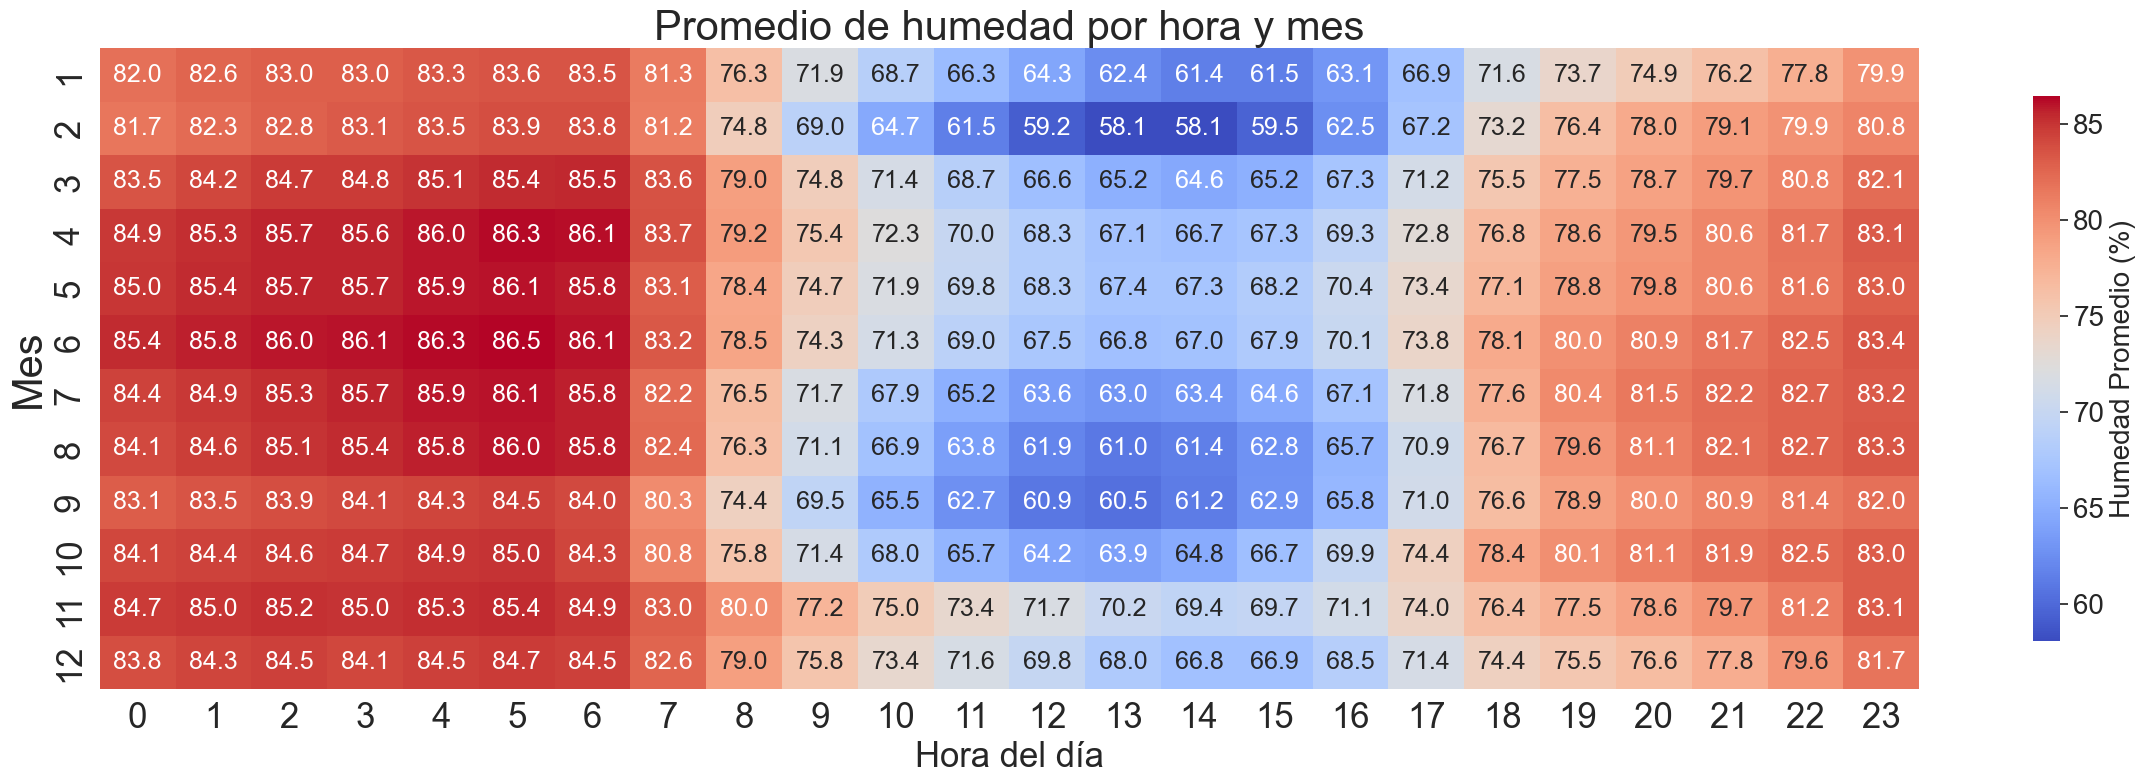

In [ ]:
# 4. Heatmap de humedad promedio por mes y hora
tabla_pivot = df_filtrado.pivot_table(index='mes', columns='hora', values='valorobservado', aggfunc='mean')

plt.figure(figsize=(24,8))
#sns.heatmap(tabla_pivot, cmap='coolwarm', annot=True, fmt=".1f")
ax = sns.heatmap(
    tabla_pivot,
    cmap='coolwarm',
    annot=True,
    fmt=".1f",
    annot_kws={"size": 18},
    cbar_kws={"shrink": 0.85} # Opcional: Ajusta el 'largo' de la barra de color.
)
plt.title('Promedio de humedad por hora y mes', fontsize=30)
plt.xlabel('Hora del día', fontsize=25)
plt.ylabel('Mes', fontsize=30)
plt.tick_params(axis='x', labelsize=25)
plt.tick_params(axis='y', labelsize=25)
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=20)
cbar.set_label('Humedad Promedio (%)', fontsize=20)
plt.grid(True)
plt.tight_layout()
plt.show()

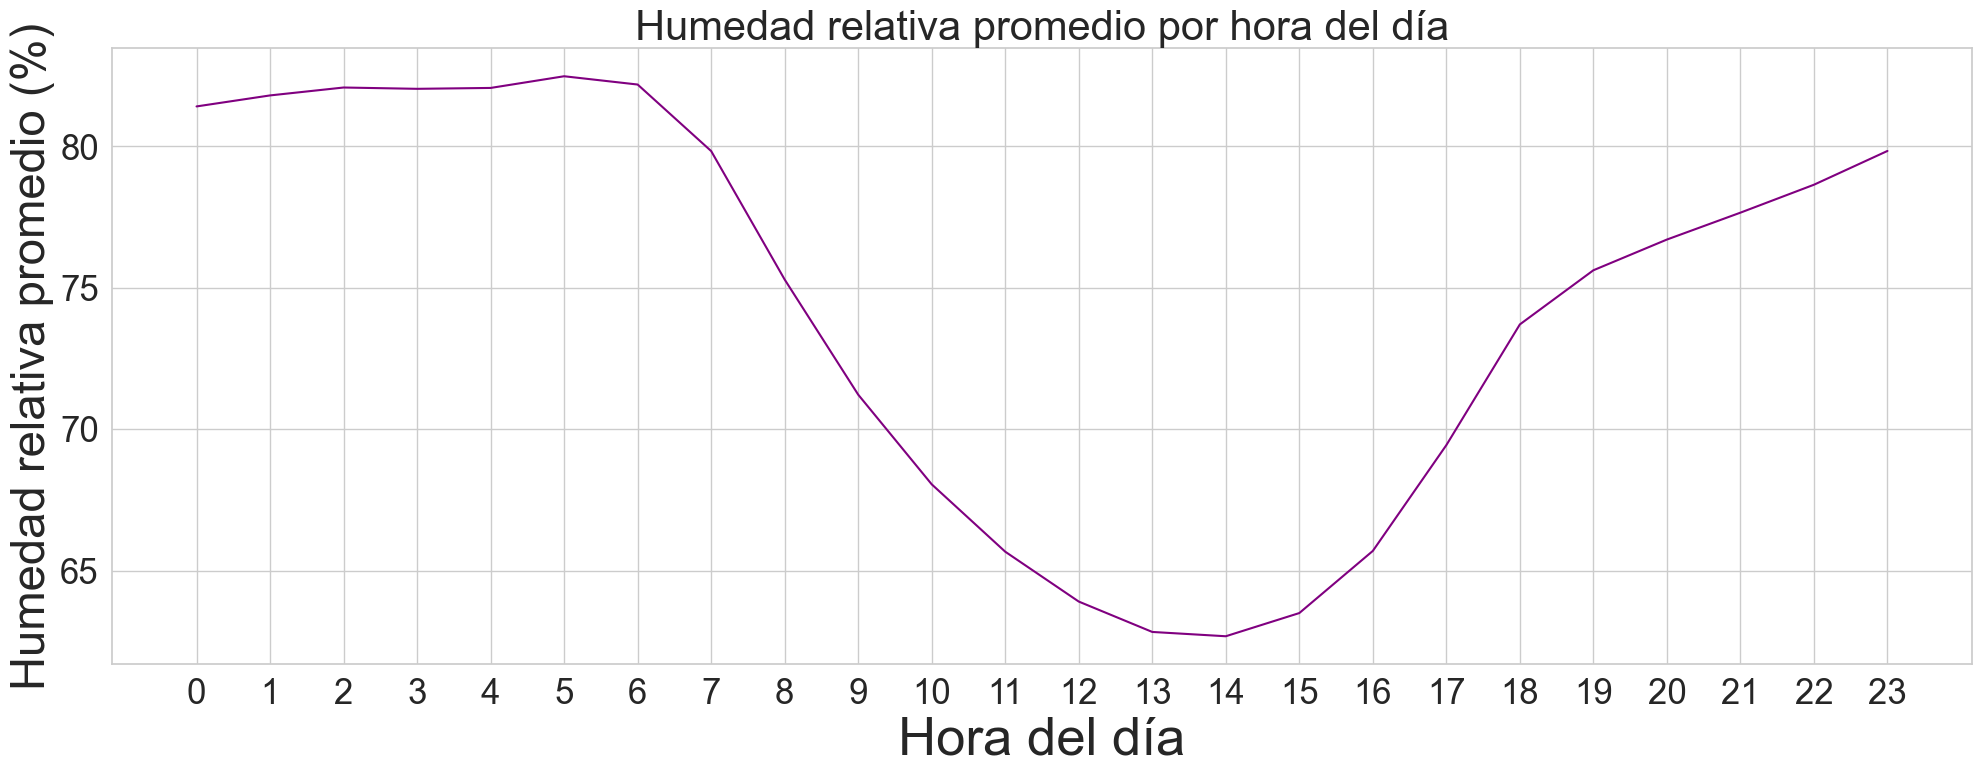

In [ ]:
# 5. Gráfico de la tendencia de la humedad promedio por hora del día
media_por_hora = df_concat.groupby('hora')['valorobservado'].mean()

plt.figure(figsize=(24, 8))
sns.lineplot(x=media_por_hora.index, y=media_por_hora.values, color='purple')
plt.title('Humedad relativa promedio por hora del día', fontsize=30)
plt.xlabel('Hora del día', fontsize=38)
plt.ylabel('Humedad relativa promedio (%)', fontsize=34)
plt.tick_params(axis='x', labelsize=25)
plt.tick_params(axis='y', labelsize=25)
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()

In [ ]:
# 5. Boxplot de humedad por mes
plt.figure(figsize=(24,6))
sns.boxplot(x='mes', y='valorobservado', data=df_filtrado, palette='viridis')
plt.title('Distribución de humedad por mes', fontsize=30)
plt.xlabel('Mes', fontsize=25)
plt.ylabel('Valor observado (%)', fontsize=20)
plt.tick_params(axis='x', labelsize=25)
plt.tick_params(axis='y', labelsize=25)
plt.grid(True)
plt.tight_layout()
plt.show()

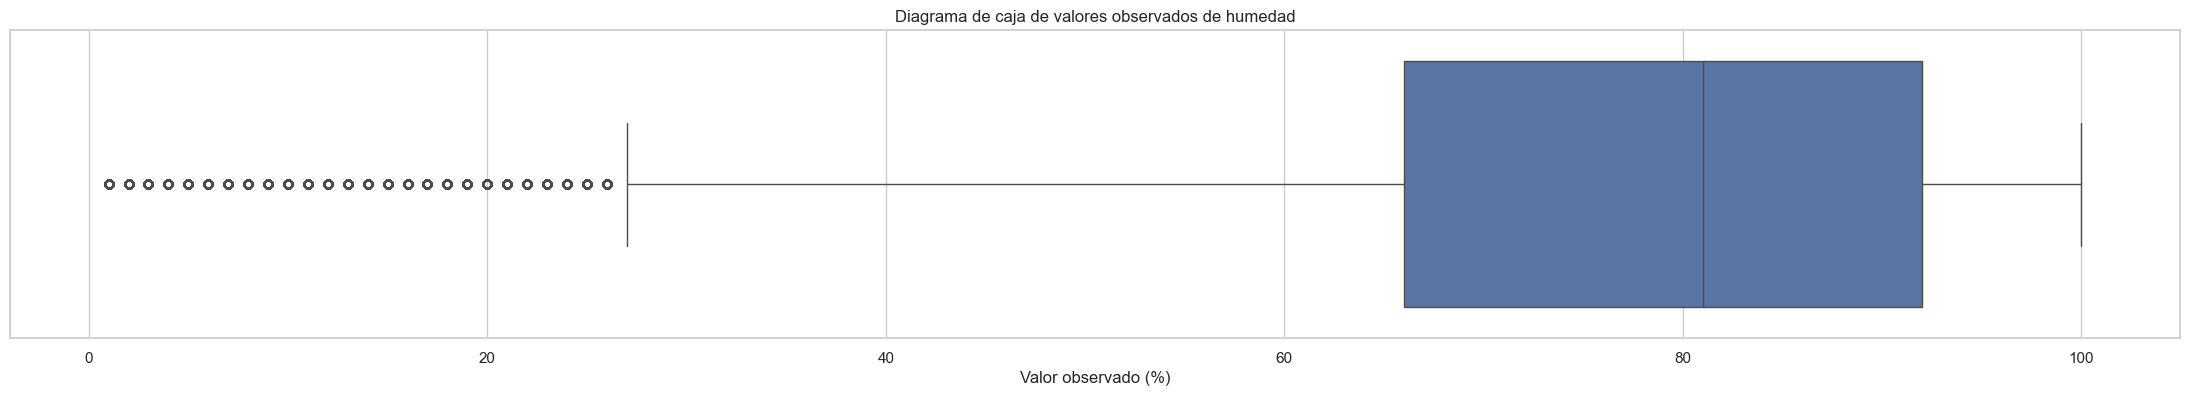

In [14]:
#OTRAS GRÁFICAS
# Boxplot para detectar outliers
plt.figure(figsize=(28,4))
sns.boxplot(x=df_filtrado['valorobservado'])
plt.title('Diagrama de caja de valores observados de humedad')
plt.xlabel('Valor observado (%)')
plt.show()

C:\Users\45686756\AppData\Local\Temp\ipykernel_23116\1205452745.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=media_departamento.values, y=media_departamento.index, palette='viridis')


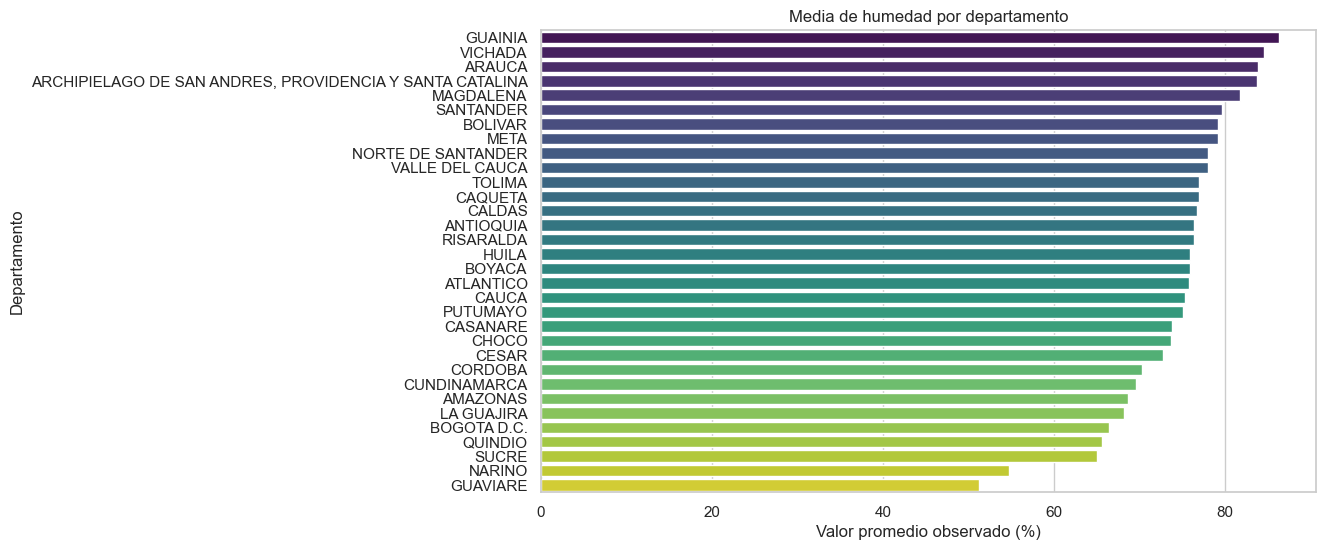

In [15]:
# Media de humedad por departamento
plt.figure(figsize=(10,6))
media_departamento = df_concat.groupby('departamento')['valorobservado'].mean().sort_values(ascending=False)
sns.barplot(x=media_departamento.values, y=media_departamento.index, palette='viridis')
plt.title('Media de humedad por departamento')
plt.xlabel('Valor promedio observado (%)')
plt.ylabel('Departamento')
plt.show()

In [16]:
valores_unicos = df_concat['valorobservado'].unique()
print(valores_unicos)

[ 99  91  98  97  96  82  89  92 100  90   0  94  14  95  74  85  70  76
  69  54  33  87  88  72  80  78  64  93  67   1   2  79  59  86  27  83
  75  77  12  65  84   3  81   4  15  73  66   6   8  18  32  71  50   5
  13   9  63  49  57  24  19  20  58  55  16  68  46  10  44  56  23  62
  40  11  61  60  45  52  53  51  34  48  47  41  36  17  43  42  30  35
  39  38  28  22  37  31  25  29  26  21   7]


C:\Users\45686756\AppData\Local\Temp\ipykernel_18352\2252458058.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='departamento', y='valorobservado', data=df_concat[df_concat['departamento'].isin(departamentos_a_comparar)], palette='muted')


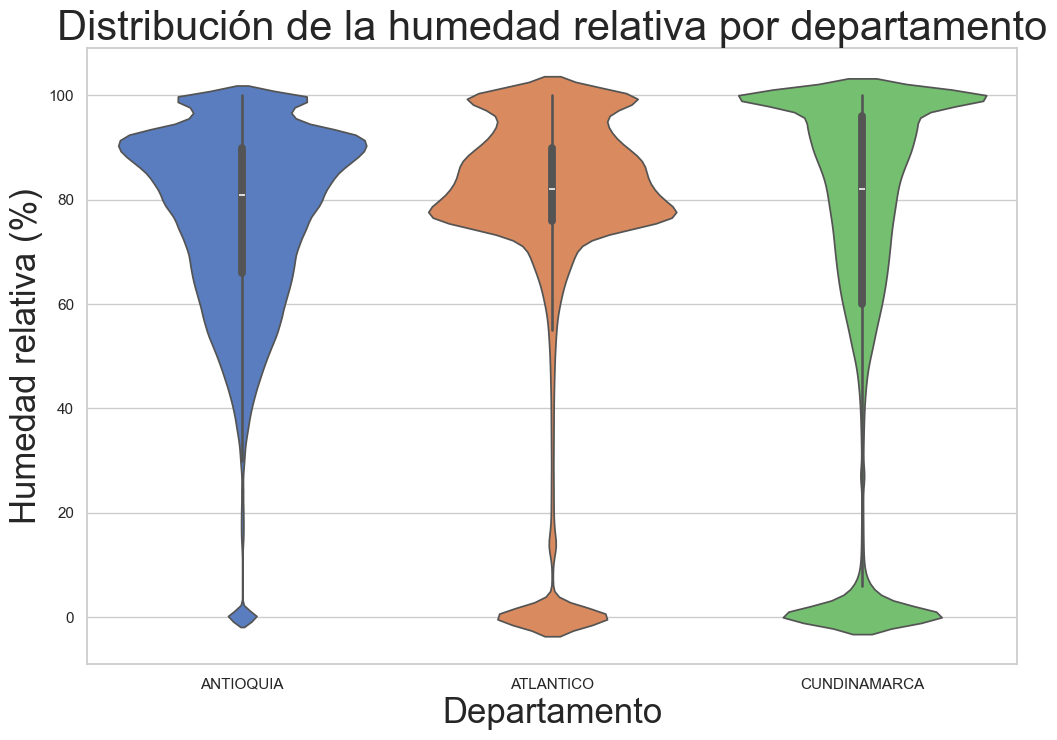

In [ ]:
# Gráfico de violín de la humedad por departamento
# Se puede filtrar por un subconjunto de los departamentos para una mejor visualización
departamentos_a_comparar = ['CUNDINAMARCA', 'ANTIOQUIA', 'ATLANTICO']

plt.figure(figsize=(12, 8))
sns.violinplot(x='departamento', y='valorobservado', data=df_concat[df_concat['departamento'].isin(departamentos_a_comparar)], palette='muted')
plt.title('Distribución de la humedad relativa por departamento', fontsize=30)
plt.xlabel('Departamento', fontsize=25)
plt.ylabel('Humedad relativa (%)', fontsize=25)
plt.show()

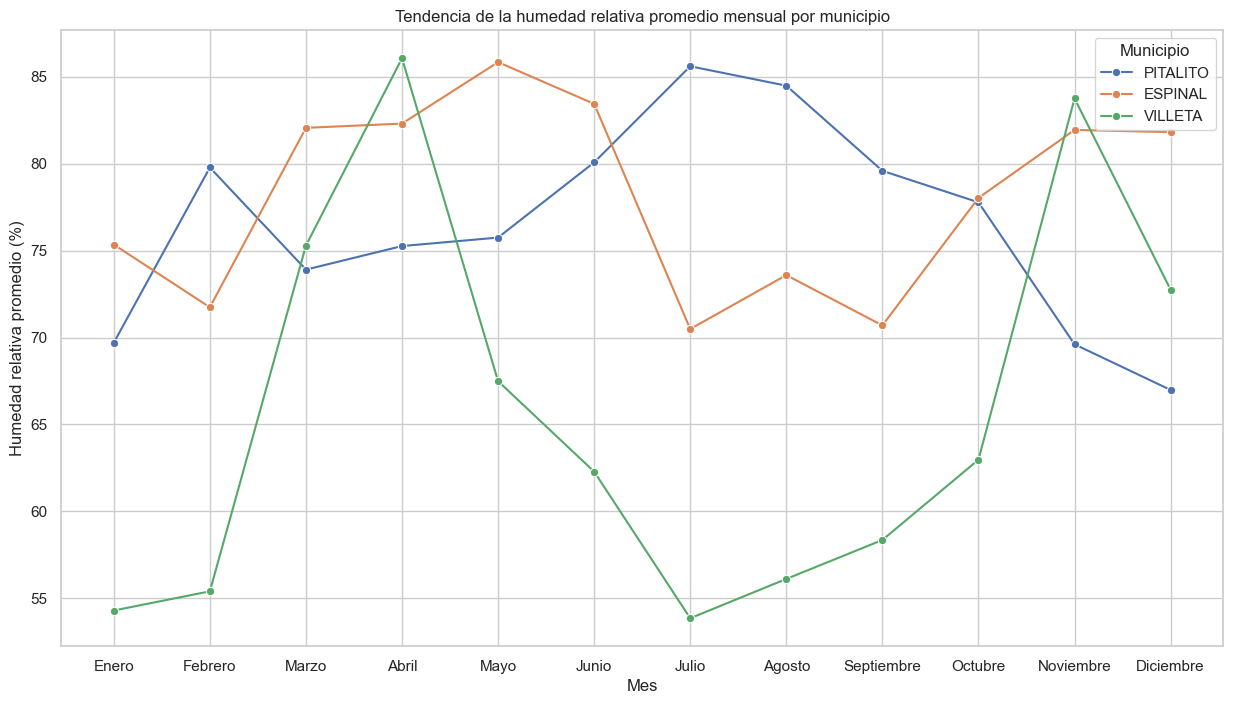

In [28]:
# Gráfico de líneas con la tendencia promedio mensual para diferentes municipios
# Puedes seleccionar un par de municipios de interés para comparar sus patrones estacionales
municipios_a_comparar = ['PITALITO', 'ESPINAL', 'VILLETA']

plt.figure(figsize=(15, 8))
# Agrupar y calcular la media mensual para cada municipio
df_filtrado = df_concat[df_concat['municipio'].isin(municipios_a_comparar)]
media_mensual = df_filtrado.groupby(['municipio', 'nombre_mes'])['valorobservado'].mean().unstack()

# Asegurar el orden correcto de los meses
meses_ordenados = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']
media_mensual = media_mensual.reindex(columns=meses_ordenados)

# Crear el gráfico de líneas
for municipio in municipios_a_comparar:
    sns.lineplot(x=media_mensual.columns, y=media_mensual.loc[municipio], marker='o', label=municipio)

plt.title('Tendencia de la humedad relativa promedio mensual por municipio')
plt.xlabel('Mes')
plt.ylabel('Humedad relativa promedio (%)')
plt.legend(title='Municipio')
plt.grid(True)
plt.show()